In [2]:
import pandas as pd
import numpy as np

In [ ]:
# 데이터 불러오기

In [3]:
movies = pd.read_csv('data/KEEP.dat', sep='\t', error_bad_lines=False)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (376,377,378,810,1783,1859) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
movies

,Y16SID,Y16HID,Y16AID,Y16TID,GENDER,Y19SY01001,Y19SY01002,Y19SY01003,Y19SY01004,Y19SA01001,...,Y19SZ01001,Y19SZ01002,Y19SZ01003,Y19SZ01004,Y19SZ01005,Y19SZ01006,Y19SZ01007,Y19SZ01008,Y19SZ01009,Y19SZ01010
0,111001301,1110013011,111001,1110013,2,2,201802,1,1,-5,...,3,0.0,8.0,2,2,-5,1,2,7,7
1,111001302,1110013021,111001,1110013,1,2,201802,1,1,-5,...,3,5.0,6.0,3,2,-5,2,-5,8,6
2,111001303,1110013031,111001,1110013,2,2,201802,3,3,-5,...,4,6.0,7.0,1,2,-5,1,3,8,8
3,111001304,1110013041,111001,1110013,1,2,201802,3,3,-5,...,4,2.0,6.0,2,2,-5,1,3,10,9
4,111001305,1110013051,111001,1110013,2,2,201802,1,1,-5,...,2,0.5,5.5,5,2,-5,2,-5,9,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8480,293415301,2934153011,293415,2934153,1,2,201802,1,1,-5,...,5,14.0,7.0,1,1,10,1,1,7,7
8481,293415302,2934153021,293415,2934153,1,2,201801,1,1,-5,...,2,2.0,8.0,1,2,-5,1,2,10,9
8482,293415303,2934153031,293415,2934153,1,2,201802,1,1,-5,...,4,14.0,8.0,5,2,-5,1,2,11,8
8483,293415304,2934153041,293415,2934153,1,2,201802,2,4,-5,...,5,6.0,5.0,1,1,40,1,5,11,11


In [6]:
# 직업 결정 유무 칼럼 확인

In [7]:
movies['Y19SN01001']

0       1
1       1
2       1
3       1
4       1
       ..
8480    1
8481    1
8482    1
8483    2
8484    1
Name: Y19SN01001, Length: 8485, dtype: int64

In [8]:
movies.rename(columns={'Y19SN01001':'직업 결정 유무'}, inplace=True)

In [9]:
job_choice = pd.DataFrame(movies['직업 결정 유무'].value_counts())
print(job_choice)

   직업 결정 유무
2      5058
1      3427


In [10]:
# 한글 폰트 사용을 위해서 세팅

import matplotlib.pyplot as plt
 
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

TypeError: sort_values() missing 1 required positional argument: 'by'

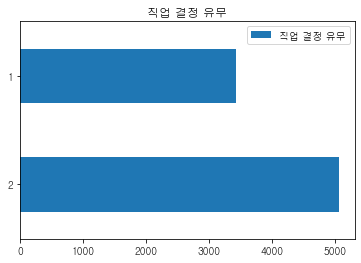

In [14]:
# 직업 결정 유무 그래프

job_choice.plot(kind='barh',title='직업 결정 유무')

# 내림차순 정렬
job_choice.sort_values().plot(by='직업 결정 유무', kind='barh',title='직업 결정 유무')
plt.show()

##### 직업에 대한 업무 내용 이해 정도

In [5]:
movies['Y19SN01003']

0       3
1       4
2       4
3       4
4       4
       ..
8480    2
8481    5
8482    4
8483   -5
8484    1
Name: Y19SN01003, Length: 8485, dtype: int64

In [6]:
movies.rename(columns={'Y19SN01003':'업무 내용'}, inplace=True)

In [7]:
job_doing = pd.DataFrame(movies['업무 내용'].value_counts())
print(job_doing)

    업무 내용
-5   5058
 4   2077
 3    646
 5    645
 2     56
 1      3


In [8]:
job_doing = job_doing.drop(job_doing.index[0])

In [9]:
job_doing

,업무 내용
4,2077
3,646
5,645
2,56
1,3


TypeError: sort_values() missing 1 required positional argument: 'by'

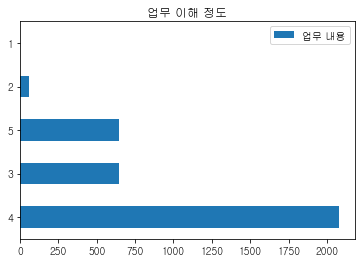

In [15]:
job_doing.plot(kind='barh',title='업무 이해 정도')

# 내림차순 정렬
job_doing.sort_values().plot(by=descending, kind='barh',title='업무 이해 정도')
plt.show()

##### 직업에 대한 전망, 비전 이해 정도

In [18]:
movies['Y19SN01004']

0       3
1       5
2       4
3       4
4       4
       ..
8480    2
8481    5
8482    5
8483   -5
8484    1
Name: Y19SN01004, Length: 8485, dtype: int64

In [19]:
movies.rename(columns={'Y19SN01004':'전망⋅비전'}, inplace=True)

In [20]:
job_vision = pd.DataFrame(movies['전망⋅비전'].value_counts())
print(job_vision)

    전망⋅비전
-5   5058
 4   1990
 3    831
 5    528
 2     73
 1      5


In [21]:
job_vision

,전망⋅비전
-5,5058
4,1990
3,831
5,528
2,73
1,5


In [22]:
job_vision = job_vision.drop(job_vision.index[0])

In [23]:
job_vision

,전망⋅비전
4,1990
3,831
5,528
2,73
1,5


TypeError: sort_values() missing 1 required positional argument: 'by'

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8901 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8901 missing from current font.
  font.set_text(s, 0, flags=flags)


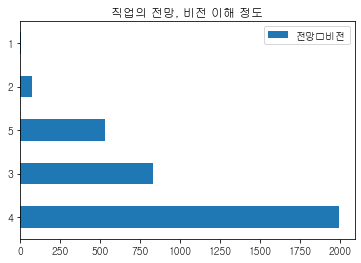

In [42]:
job_vision.plot(kind='barh',title='직업의 전망, 비전 이해 정도')

# 내림차순 정렬
job_vision.sort_values().plot(by=descending, kind='barh',title='직업의 전망, 비전 이해 정도')
plt.show()

##### 직업의 임금(보수, 수입) 이해 정도

In [26]:
movies['Y19SN01005']

0       3
1       4
2       4
3       3
4       4
       ..
8480    2
8481    5
8482    4
8483   -5
8484    1
Name: Y19SN01005, Length: 8485, dtype: int64

In [27]:
movies.rename(columns={'Y19SN01005':'임금(보수, 수입)'}, inplace=True)

In [28]:
job_wages = pd.DataFrame(movies['임금(보수, 수입)'].value_counts())
print(job_wages)

    임금(보수, 수입)
-5        5058
 4        1433
 3        1283
 5         373
 2         321
 1          17


In [29]:
job_wages.drop(job_wages.index[0], inplace=True)

In [30]:
job_wages

,"임금(보수, 수입)"
4,1433
3,1283
5,373
2,321
1,17


TypeError: sort_values() missing 1 required positional argument: 'by'

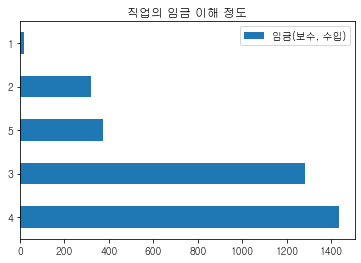

In [41]:
job_wages.plot(kind='barh',title='직업의 임금 이해 정도')

# 내림차순 정렬
job_wages.sort_values().plot(by=descending, kind='barh',title='직업의 임금 이해 정도')
plt.show()

##### 미래 직업을 결정하지 못하는 이유

In [32]:
movies['Y19SN01006']

0      -5
1      -5
2      -5
3      -5
4      -5
       ..
8480   -5
8481   -5
8482   -5
8483    1
8484   -5
Name: Y19SN01006, Length: 8485, dtype: int64

In [33]:
movies.rename(columns={'Y19SN01006':'직업_결정X'}, inplace=True)

In [34]:
job_not_determine = pd.DataFrame(movies['직업_결정X'].value_counts())
print(job_not_determine)

    직업_결정X
-5    3427
 1    1885
 2     964
 4     959
 5     633
 8     311
 6     196
 3      74
 7      23
-3      11
-2       2


In [35]:
print(type(job_not_determine))

<class 'pandas.core.frame.DataFrame'>


In [36]:
job_not_determine.drop(job_not_determine.index[0], inplace=True)

In [37]:
job_not_determine.drop(job_not_determine.index[8], inplace=True)

In [38]:
job_not_determine.drop(job_not_determine.index[8], inplace=True)

In [39]:
job_not_determine

,직업_결정X
1,1885
2,964
4,959
5,633
8,311
6,196
3,74
7,23


TypeError: sort_values() missing 1 required positional argument: 'by'

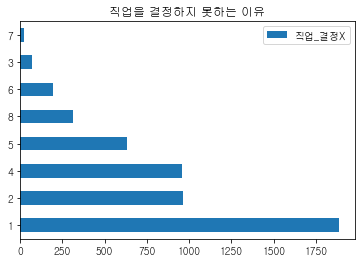

In [40]:
job_not_determine.plot(kind='barh',title='직업을 결정하지 못하는 이유')

# 내림차순 정렬
job_doing.sort_values().plot(by=descending, kind='barh',title='직업을 결정하지 못하는 이유')
plt.show()